#### 1. Importing the dataset

In [1]:
import pandas as pd

#reading the dataset in the workspace 
data = pd.read_csv("QTL_HW.csv", header=None)

In [2]:
# dimensions of the dataset
data.shape

(360, 11)

In [3]:
data

,0,1,2,3,4,5,6,7,8,9,10
0,183.61,0,0,0,1,0,1,1,0,0,0
1,180.82,0,0,1,1,1,1,1,0,0,1
2,183.29,1,1,1,1,1,0,1,0,0,0
3,191.86,1,1,1,1,1,1,1,1,0,0
4,194.46,0,0,1,1,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
355,193.98,0,1,1,1,0,0,1,1,0,1
356,184.50,1,1,1,1,0,1,1,1,0,0
357,189.54,0,1,1,1,1,1,1,1,0,1
358,85.25,1,-1,0 0.00000,0 1.00000,0 1.00000,0 0.00000,0 1.00000,0 0.00000,0 1.00000,0 0.000000


##### *__we observe that the 358th data point fly is somewhat corrupted.__*
##### values are have two digit and blank before the decimal point and there is an unexpected negative number for the second locus

##### Plus the obseved frequency for that data point seems to be the only one too different from all others: its value is 
##### __85.54__ while all others are between : __170.68 and 200.08.__
##### *__We decide to drop that data point as we suspect an outlier__*

In [4]:
data_rem=data.drop(358, axis='index')

In [5]:
data_rem

,0,1,2,3,4,5,6,7,8,9,10
0,183.61,0,0,0,1,0,1,1,0,0,0
1,180.82,0,0,1,1,1,1,1,0,0,1
2,183.29,1,1,1,1,1,0,1,0,0,0
3,191.86,1,1,1,1,1,1,1,1,0,0
4,194.46,0,0,1,1,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
354,181.17,0,0,0,1,1,1,1,1,0,0
355,193.98,0,1,1,1,0,0,1,1,0,1
356,184.50,1,1,1,1,0,1,1,1,0,0
357,189.54,0,1,1,1,1,1,1,1,0,1


In [6]:
import numpy as np

In [7]:
# sine song frequencies 
f = np.array(data_rem[0])
print("shape of frequencies array is", f.shape, "and dtype is :", f.dtype)

shape of frequencies array is (359,) and dtype is : float64


In [8]:
# genotype array for all 10 loci
g = np.array([data_rem[i] for i in range(1,11)], dtype="float64")
print("shape of the genotype array for the 5th locus is:", g[5].shape, "and dtype is :", g.dtype)

shape of the genotype array for the 5th locus is: (359,) and dtype is : float64


#### 2. Recalling the expression of the Ratio

$Ratio = \dfrac{P(D|a_*, b_*, \sigma, QTL)}{P(D|c_*, \sigma, NQTL)} \times \sqrt{\dfrac{2\pi/N}{\bar{gg} - \bar{g}\bar{g}}}\times \sigma \times \dfrac{\sigma_{c}}{\sigma_{a}\sigma_{b}}$



#### 3. Expressions of parameters in the Ratio  
 

$\bar{f} = \frac{1}{N}\sum{f_k}$           

$\bar{g} = \frac{1}{N}\sum{g_k}$

$ \bar{fg} = \frac{1}{N}\sum{f_kg_k}$

$\bar{gg} = \frac{1}{N}\sum{g_kg_k}$

In [9]:
f.shape

(359,)

In [10]:
g.shape

(10, 359)

In [11]:
np.multiply(f, g[1,:]).shape

(359,)

In [12]:
# calculations

N = g.shape[1]

f_bar = f.mean()

g_bar = g.mean(axis=1)

fg_bar = np.mean(np.array([np.multiply(f, g[i,:]) for i in range(g.shape[0])]), axis=1)

gg_bar = np.mean(np.array([np.multiply(g[i,:], g[i,:]) for i in range(g.shape[0])]), axis=1)



For the Factor_1 : $\sqrt{\dfrac{2\pi/N}{\bar{gg} - (\bar{g})^2}}\times \sigma \times \dfrac{\sigma_{c}}{\sigma_{a}\sigma_{b}}$

We have, 
  $\sigma = \sqrt{\dfrac{\sum{(f_k -\bar{f})^2}}{N}}$ and $\sigma_a=\dfrac{\sigma}{\sqrt{N}}$ and $ \sigma_b=\dfrac{\sigma}{\sqrt{N\times \bar{gg}}} $ and $ \sigma_c=\dfrac{\sigma}{\sqrt{N}}$



In [13]:
sigma = np.sqrt(np.mean((f-f_bar)*(f-f_bar)))

sigma_a = sigma/np.sqrt(N)

sigma_b = sigma/np.sqrt(N*gg_bar)

sigma_c = sigma/np.sqrt(N)

Factor_1 = np.sqrt((((2*np.pi)/N)/(gg_bar - g_bar*g_bar)))*((sigma*sigma_c)/(sigma_a*sigma_b))

For the Factor_2 : $\dfrac{P(D|a_*, b_*, \sigma, QTL)}{P(D|c_*, \sigma, NQTL)} $


$a_*= \bar{f}-b_*\bar{g}$ and  $b_*= \dfrac{\bar{fg}-\bar{f}\bar{g}}{\bar{gg}-\bar{g}\bar{g}}$ and $\sigma = \sqrt{\dfrac{\sum{(f_k -\bar{f})^2}}{N}}$  and $c_{*} = \bar{f}$

In [14]:
b_star = (fg_bar - f_bar*g_bar)/(gg_bar - g_bar*g_bar) 

a_star = f_bar - b_star*g_bar

c_star = f_bar

sigma = np.sqrt(np.mean((f-f_bar)*(f-f_bar)))
 

#### 3. Estimating posterior probabilities   

$P(D|a_*, b_*, \sigma, QTL) = \dfrac{1}{(\sigma\sqrt{2\pi})^N} exp[-\dfrac{\sum{(f_k - a_* - b_*g_k)^2}}{2\sigma^2}] $


$P(D|c_*, \sigma, NQTL) = \dfrac{1}{(\sigma\sqrt{2\pi})^N} exp[-\dfrac{\sum{(f_k - c_*)^2}}{2\sigma^2}] $

 Factor_2 = $\dfrac{P(D|a_*, b_*, \sigma, QTL)}{P(D|c_*, \sigma, NQTL)} = \dfrac{exp[-\dfrac{\sum{(f_k - a_* - b_*g_k)^2}}{2\sigma^2}]}{exp[-\dfrac{\sum{(f_k - c_*)^2}}{2\sigma^2}]} $




In [15]:
Prob_num = np.exp(-np.sum((((np.array([f - a_star[k] - b_star[k]*g[k,:] for k in range(g.shape[0])]))**2))/(2*(sigma**2)),
                          axis=1))

In [16]:
Prob_dem = np.exp(-np.sum(((f - c_star)**2)/(2*(sigma**2))))

In [17]:
Factor_2 = Prob_num/Prob_dem

In [18]:
Ratio = Factor_2*Factor_1

In [19]:
Ratio

array([4.07529451e+00, 3.75194656e+00, 1.85871109e+01, 8.37304226e+12,
       3.69590800e+00, 5.14751731e+00, 2.02562240e+04, 3.57060602e+00,
       4.52073801e+11, 3.47321591e+00])

##### The __highest__ Probabilities by factor 10^n are :  __8.373e+12 (locus #4)__ and __4.5207e+11 (locus #9)__ and __2.02562e+04 (locus #7)__

In [20]:
np.linspace(np.min(f), np.max(f), 50)

array([170.68, 171.28, 171.88, 172.48, 173.08, 173.68, 174.28, 174.88,
       175.48, 176.08, 176.68, 177.28, 177.88, 178.48, 179.08, 179.68,
       180.28, 180.88, 181.48, 182.08, 182.68, 183.28, 183.88, 184.48,
       185.08, 185.68, 186.28, 186.88, 187.48, 188.08, 188.68, 189.28,
       189.88, 190.48, 191.08, 191.68, 192.28, 192.88, 193.48, 194.08,
       194.68, 195.28, 195.88, 196.48, 197.08, 197.68, 198.28, 198.88,
       199.48, 200.08])

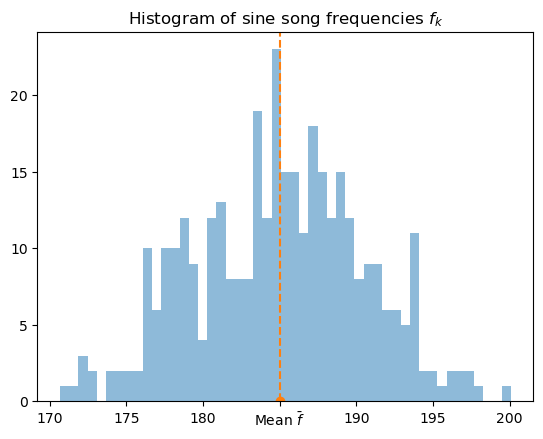

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt

bs = np.linspace(np.min(f), np.max(f), 50)


plt.hist(f, bins=bs, alpha=0.5, label='Histogram of sine song frequencies $f_k$')
#plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0)

plt.title('Histogram of sine song frequencies $f_k$')
plt.axvline(f_bar, ls='--', c='C1', label='c')
plt.plot(f_bar, 0,'o')
plt.xticks(range(170, 201, 5),['170', '175', '180','Mean $\\bar{f}$','190','195','200'])

plt.savefig("histogram_plot_QTL.png")
plt.show()


In [22]:
f_bar

184.9926740947075

### @ Thanks for reading